# Convolution Neural Network

-> Convolution Neural Network(CNN) takes input in the form of Images and Video. 
-> CNN is class of Deep Neural Network that specializes in processing an image data.
-> Applications: 
   -> image processing 
   -> classification
   -> segmentation
   -> Object detection 
-> Other words: 
   "CNN is feed forward NN used to analyse the image by processing data.
    A convolutional neural network is used to detect and classify objects in an image."


**CNN Architecture**

-> There are different layers like 
1. Conv Layer 
2. Relu Layer
3. Pooling Layer 
4. Fully Connected layer(Flatten)
that perform feature extraction task on an image.

-> Finally Output layer will perform task of final prediction.


# Input
**Image to Array in CNN: Every image represented in the form of an array of pixels ranges from 0-255**

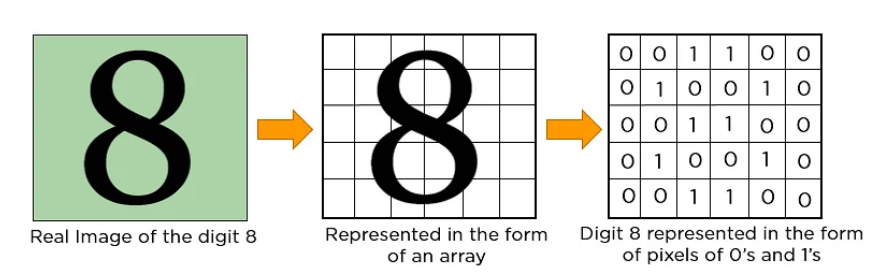

# Convolution Layer 

This is the first step to extracting the valuable featurs from an imgae. Conv Layer has a multiple filter to perform a Convolutional Operation.
Output of Conv layer; 
Output = 'n-f+1' (here, n is size of an image and f is filter)

Filters has significant role in Conv Layer. Best filter parameters will extract significant information from an image. 


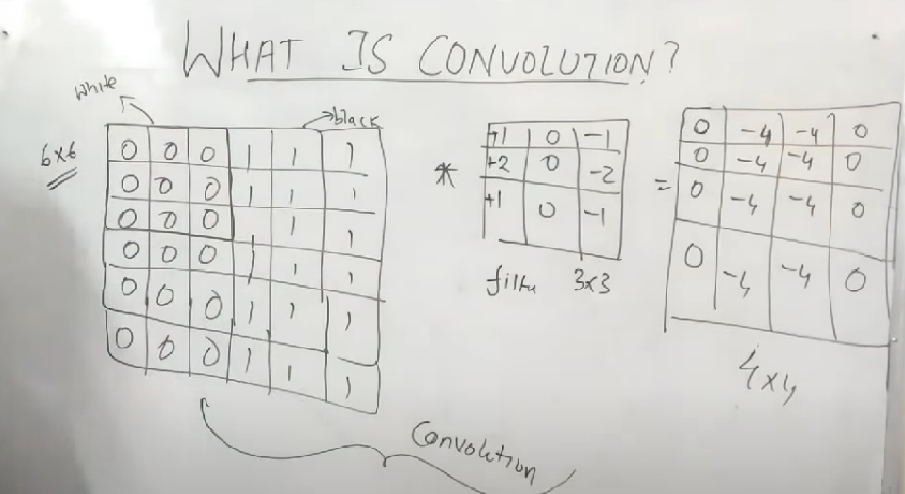

# Relu Layer 

Oeration of CNN z = w1.x1+w2.x2....wn.xn 
z' = Relu(z)

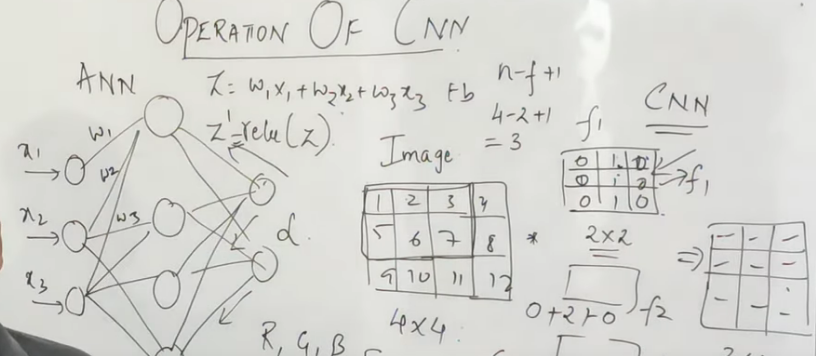

# Pooling Layer

-> Pooling mainly helps in extracting sharp and smooth features
-> It helps in extracting 'low-level features' like edges, points, etc
-> Pooling layer reduces the dimensionality of feature map and it will generate the pooled feature map
-> After getting the feature map of the convolutional layer will apply max pooling on that feature to 
   exract the more clear image.


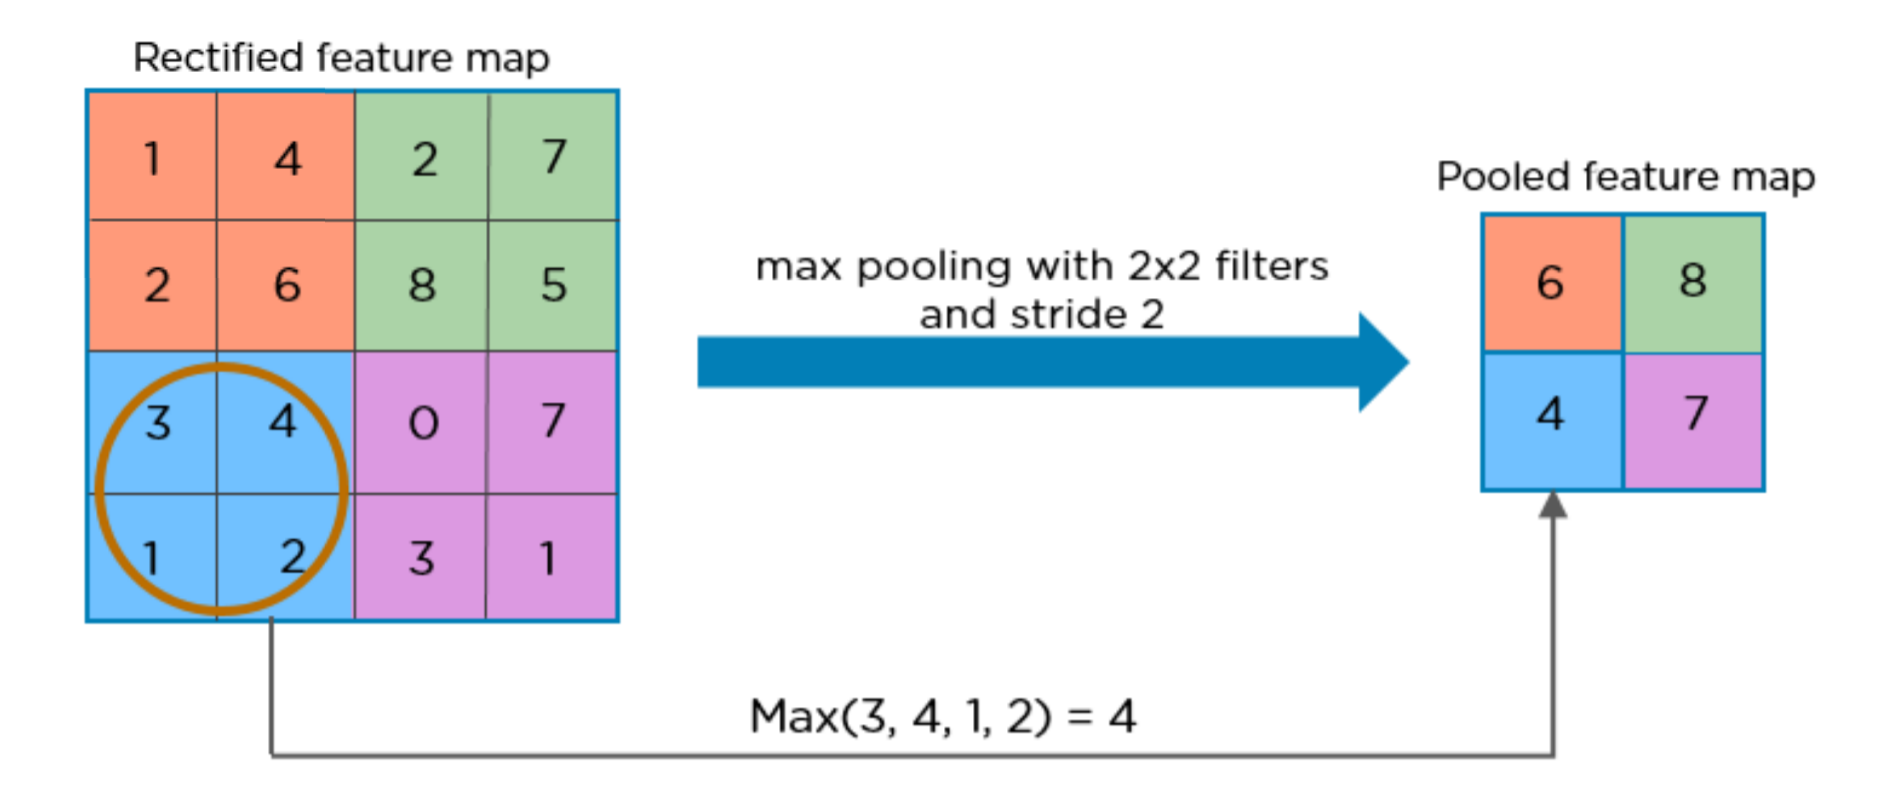

# Data Augmentation 

transfermation(add invariance) --> fliping the image, horizntal shifting, Vertical shifting, Zoom in/out. 
Here our CNN model should be ROBOST, If we add invariance into the image our CNN model will able to predict.

# Flatten Layer 

This step is called Flattening. Flattening is used to convert 2 dimensional arrays to single long continuous vector. This vector will be input for 'fully connected layer' to classify the image.

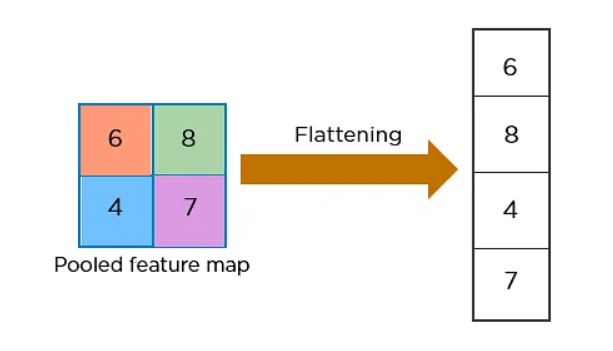

# Fully Connected Layer 

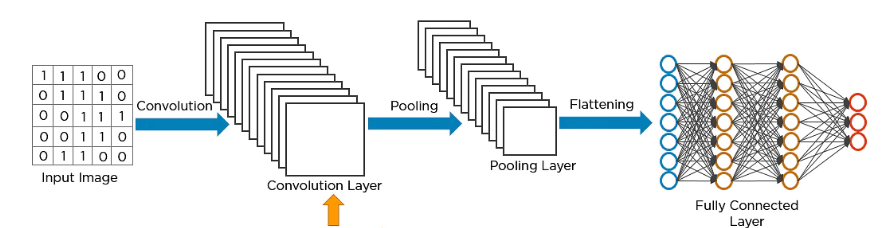

-> Above fully connected layer showing the archtitecture of gray scale(black & white) image.
-> For RGB(colored Image) CNN architecture will be; 

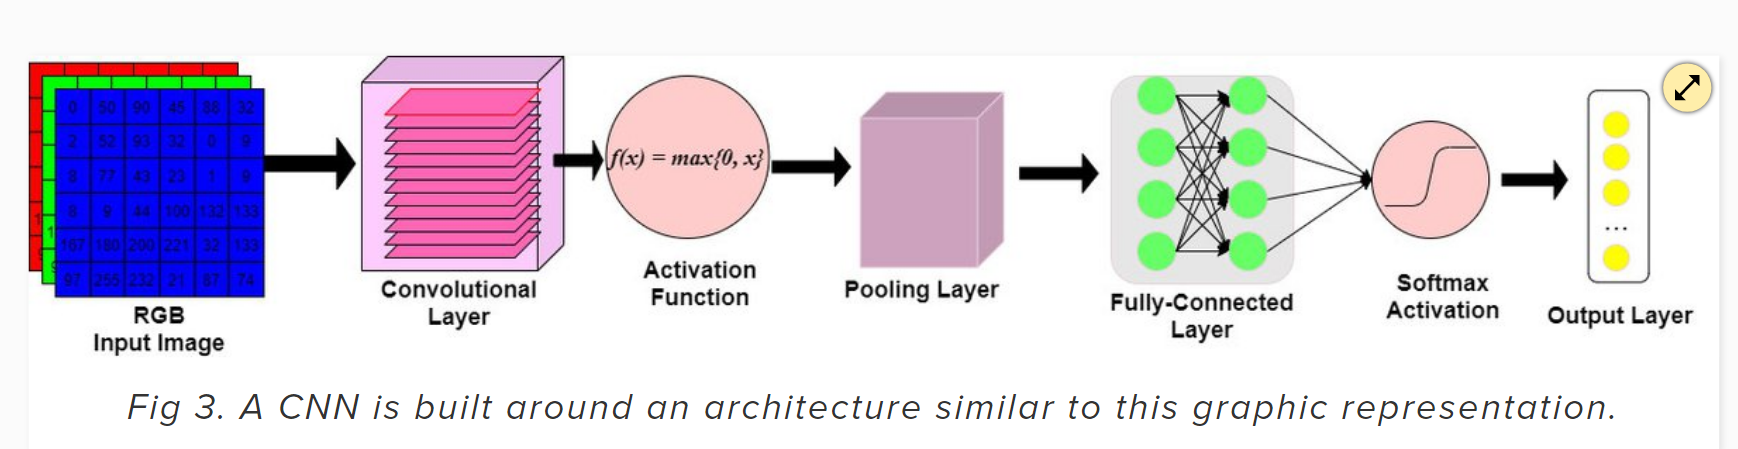

# Practical Implementation 

For practical implimentation of CNN model GPU will require to speed up the computaion because of many iterations. 
Google colab allows to use GPU for limited time. 
Required Libraries : 
1. Keras Tuner 
2. Tensorflow 

Keras : 
      Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.
      Keras is the most used deep learning framework. Keras makes easier to run new experiments.
      Keras model can easily  deploy on the Tensorflow framework
      Supports both convolutional networks and recurrent networks, as well as combinations of the two.
      Runs seamlessly on CPU and GPU.
      
Tensorflow : 
      TensorFlow is an end-to-end platform that makes it easy to build and deploy ML models.
      TensorFlow offers multiple levels of abstraction choose the right one as needs. 
      Build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine               learning easy.



**Coding**

In [ ]:
# !pip install keras-tuner
"""
Keras Tuner : 
      KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of
      hyperparameter search. Easily configure your search space with a define-by-run syntax, then leverage one of the
      available search algorithms to find the best hyperparameter values for your models. KerasTuner comes with Bayesian 
      Optimization, Hyperband, and Random Search algorithms built-in, and is also designed to be easy for researchers
      to extend in order to experiment with new search algorithms.
"""

In [ ]:
# import libaries 
import tensorflow as tf
from tensorflow import keras
import numpy as np 

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist 
# keras.datasets will provide the data
# fasion_mnist data has images of different class like T-shirt, Trouser etc. 
# total 10 classes 
# fasion_mnist data consist of 60000(train_data)and 10000(test_data) images and Each image has a 28x28 grayscale pixels 
# Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value 
# associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.
# This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns
# 

In [ ]:
(train_images, train_lables), (test_images, test_lables) = fashion_mnist.load_data()
# Load MNIST data into train and test sets

In [ ]:
train_images = train_images/250
test_images =test_images/250
# normalize the pixel value and equally divided by the 250  
# scaled down 0-1
# it will help to quickly training the Model 

In [ ]:
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)
# reshape the images
#  4D array as input to the CNN 
#  Keras expects image dimension as (Width, Height, Channels)

**CNN Model**

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
      # arrange the sequence of layers
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # set numbers of filters 
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        # set size of filters 
        activation='relu',
        # activation function 
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        # set numbers of neurons 
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
      # Output layer 
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                # Optimization methods 
              loss='categorical_crossentropy',
                # loss function 
              metrics=['accuracy'])
  
  return model